In [1]:
%matplotlib inline
import os
import re
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
#import seaborn as sns
import pyGadget
mpl.rc('font', size=20.)
mpl.rc('font', family='serif')
mpl.rc('text', usetex=True)

In [2]:
simV0 = pyGadget.sim.Simulation('stampede/no_bkg',length='pc', coordinates='physical')
snapV0 = simV0.load_snapshot(266)
simV = pyGadget.sim.Simulation('lonestar/vanilla2',length='pc', coordinates='physical')
#snapV = simV.load_snapshot(176)
snapV = simV.load_snapshot(200)
sim = pyGadget.sim.Simulation('lonestar/cr05',length='pc', coordinates='physical')
snap = sim.load_snapshot(139)
sim0 = pyGadget.sim.Simulation('stampede/cr05',length='pc', coordinates='physical')
snap0 = sim0.load_snapshot(140)

Turning on gas particle refinement.
There are 8000000 highest resolution particles.
Turning on gas particle refinement.
There are 2959944 highest resolution particles.
Turning on gas particle refinement.
There are 11239424 highest resolution particles.
Turning on gas particle refinement.
There are 8000000 highest resolution particles.


In [3]:
snapV.header.Redshift, snap.header.Redshift

(21.758874788591768, 26.80719682992256)

In [4]:
2.725*(1+snapV.header.Redshift), 2.725*(1+snap.header.Redshift)

(62.017933798912573, 75.774611361538973)

In [5]:
snap.sim.units.length_unit

'pc'

In [6]:
snap.gas.load_coords()
snap.gas.load_masses()
snap.gas.load_number_density()
snap.gas.load_PIDs()

In [7]:
snap.gas.coordinates.max()

29263.617396369744

In [8]:
np.unique(snap.gas.masses)

array([ 1.84634688])

In [9]:
snap.gas.masses.max(), snap.gas.masses.min()

(1.8463468849055127, 1.8463468849055127)

In [10]:
snap.gas.ndensity.max(), snap.gas.ndensity.min()

(100063744.12963402, 0.00078181319938730367)

In [11]:
img = pyGadget.visualize.project(snap, 'ndensity', '1000pc', 'xz', centering='avg')

Calculating...
Center averaged over 107 particles
Center averaged over all particles with density greater than 7.81e+05 particles/cc
Density averaged box center: 2.572e+04 2.555e+04 2.548e+04
 x:: max: 5.000e+02 min: -5.000e+02
 y:: max: 5.000e+02 min: -5.000e+02
ndensity:: min: 7.679e-03 max: 6.251e+03
log(ndensity):: min: -2.115e+00 max: 3.796e+00


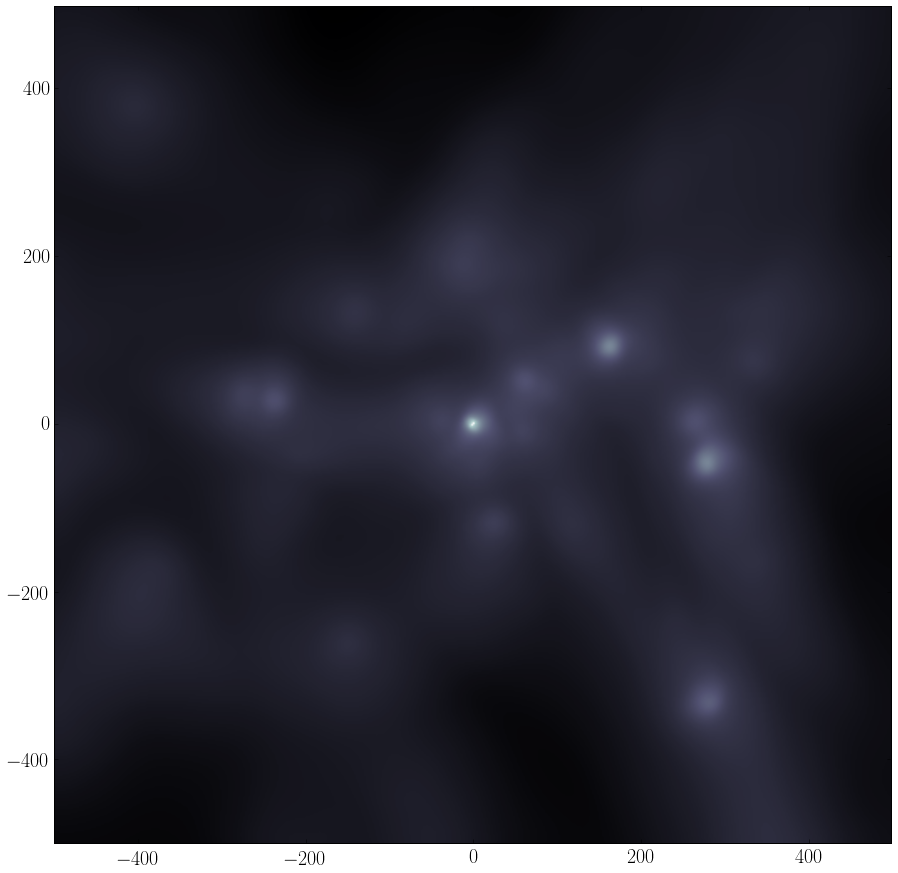

In [12]:
fig = plt.figure(figsize=(15,15))
x,y,z = img
plt.imshow(z, extent=[x.min(),x.max(),y.min(),y.max()], cmap=plt.cm.bone, origin='lower')
fig.savefig('figures/structure/halo2_environment_1kpc.png', bbox_inches='tight')

In [13]:
ars_temp = pd.read_csv(os.getenv("HOME")+'/data/literature_data/Stacy_Bromm2007/f2_nocr.csv', names=['n', 'temp'])
ars_temp_hiSF = pd.read_csv(os.getenv("HOME")+'/data/literature_data/Stacy_Bromm2007/f2_1e6_high.csv', names=['n', 'temp'])
ars_temp_loSF = pd.read_csv(os.getenv("HOME")+'/data/literature_data/Stacy_Bromm2007/f2_1e6_low.csv', names=['n', 'temp'])

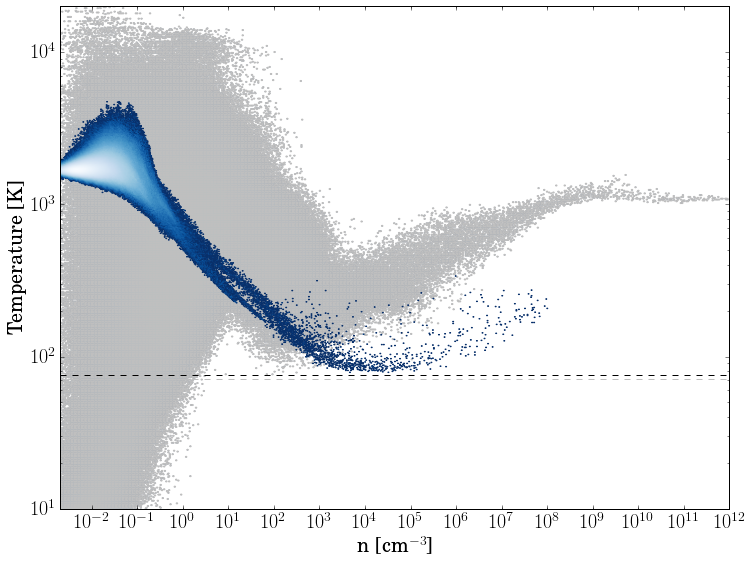

In [14]:
fig,ax = plt.subplots(figsize=(12,9))
ax = pyGadget.multiplot.Phase.temp(snapV,ax, rasterized=True, color='.75', cmbline=False)
ax = pyGadget.multiplot.Phase.temp(snap,ax, rasterized=True, cmap=plt.cm.Blues_r)
ax.set_xlim(2e-3, 1e12)
ax.axhline(2.725 * (snapV0.header.Redshift + 1), ls='--', color='.75')
#fig.savefig('figures/phase_diagrams/halo2_temp.png', bbox_inches='tight')

(0.002, 100000000.0)

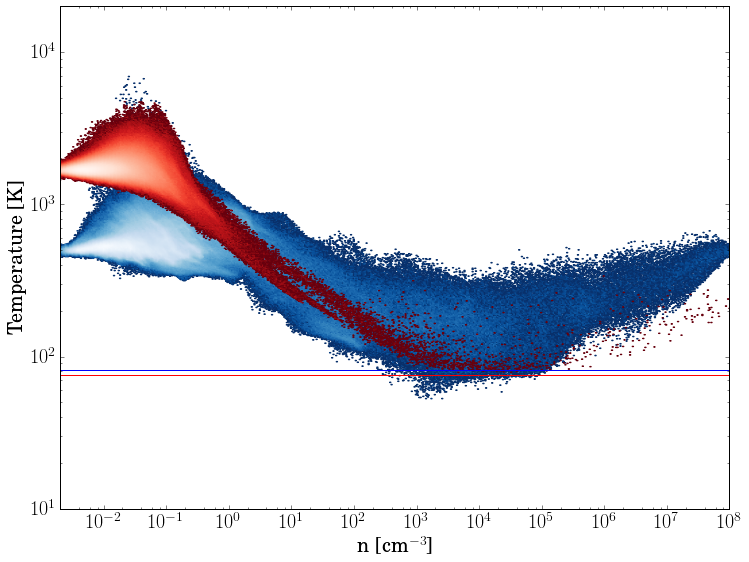

In [15]:
fig,ax = plt.subplots(figsize=(12,9))
ax = pyGadget.multiplot.Phase.temp(snap0,ax, rasterized=True, cmap=plt.cm.Blues_r, cmbline=False)
ax = pyGadget.multiplot.Phase.temp(snap,ax, rasterized=True, cmap=plt.cm.Reds_r, cmbline=False)
ax.axhline(2.725 * (snap0.header.Redshift + 1), ls='-', color='b')
ax.axhline(2.725 * (snap.header.Redshift + 1), ls='-', color='r')
ax.set_xlim(2e-3, 1e8)

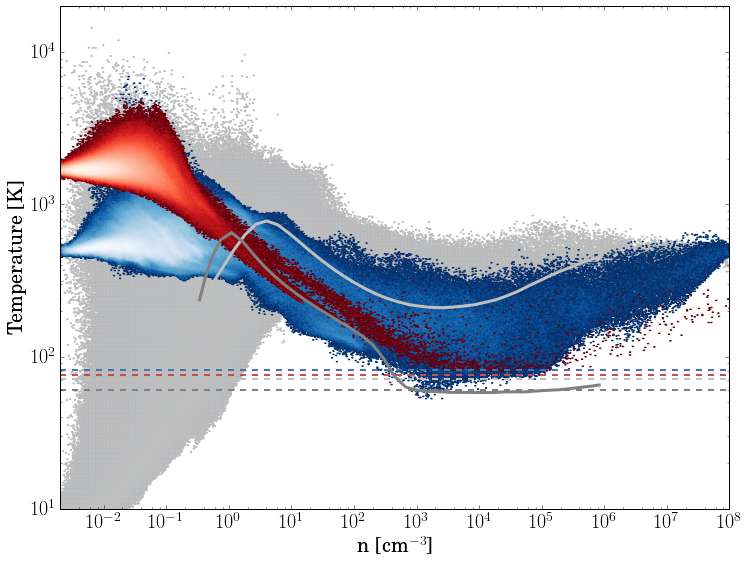

In [16]:
fig,ax = plt.subplots(figsize=(12,9))
ax.axhline(2.725 * (snapV0.header.Redshift + 1), lw=2, ls='--', color='.75')
ax.axhline(2.725 * (snap0.header.Redshift + 1), lw=2, ls='--', 
           color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725))
ax.axhline(2.725 * (snap.header.Redshift + 1), lw=2, ls='--', 
           color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
ax.axhline(2.725 * (21 + 1), lw=2, ls='--', color='.5')
ax = pyGadget.multiplot.Phase.temp(snapV0,ax, rasterized=True, color='.75', cmbline=False)
ax = pyGadget.multiplot.Phase.temp(snap0,ax, rasterized=True, cmap=plt.cm.Blues_r, cmbline=False)
ax = pyGadget.multiplot.Phase.temp(snap,ax, rasterized=True, cmap=plt.cm.Reds_r, cmbline=False)
ax.plot(ars_temp.n, ars_temp.temp, color='.75', lw=3, ls='-', label="one-zone model")
ax.plot(ars_temp_hiSF.n, ars_temp_hiSF.temp, color='.5', lw=3, ls='-', label="one-zone, high SF")
#ax.plot(ars_temp_loSF.n, ars_temp_loSF.temp, color='.5', lw=3, ls='--', label="one-zone, low SF")
ax.set_xlim(2e-3,1e8)
fig.savefig('figures/phase_diagrams/halo2_1zone_comparison.png', bbox_inches='tight')

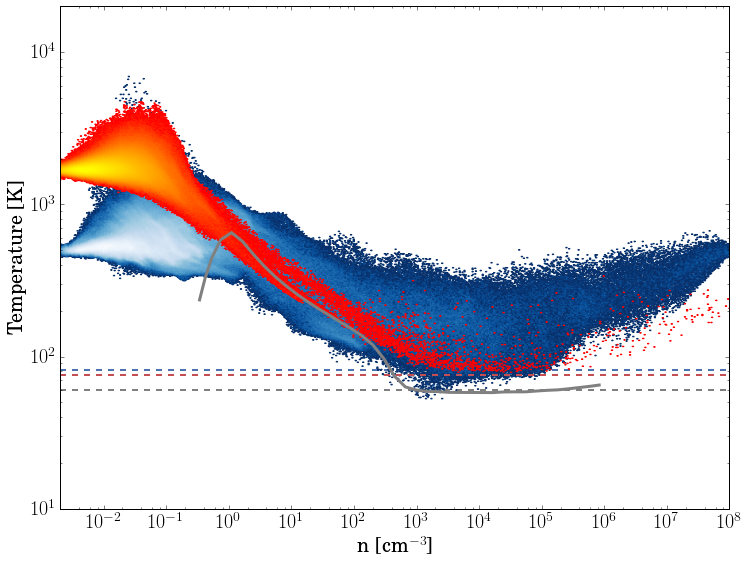

In [17]:
fig,ax = plt.subplots(figsize=(12,9))
ax.axhline(2.725 * (snap0.header.Redshift + 1), lw=2, ls='--', zorder=1,
           color=(0.2980392156862745, 0.4470588235294118, 0.6901960784313725))
ax.axhline(2.725 * (snap.header.Redshift + 1), lw=2, ls='--', zorder=2,
           color=(0.7686274509803922, 0.3058823529411765, 0.3215686274509804))
ax.axhline(2.725 * (21 + 1), lw=2, ls='--', color='.5', zorder=1)
ax = pyGadget.multiplot.Phase.temp(snap0,ax, rasterized=True, cmap=plt.cm.Blues_r, cmbline=False, zorder=2)
ax = pyGadget.multiplot.Phase.temp(snap,ax, rasterized=True, cmap=plt.cm.autumn, cmbline=False, zorder=2)
ax.plot(ars_temp_hiSF.n, ars_temp_hiSF.temp, color='.5', lw=3, ls='-', zorder=3, label="one-zone, high SF")
ax.set_xlim(2e-3,1e8)
fig.savefig('figures/phase_diagrams/halo2_cr05_comparison.png', bbox_inches='tight')

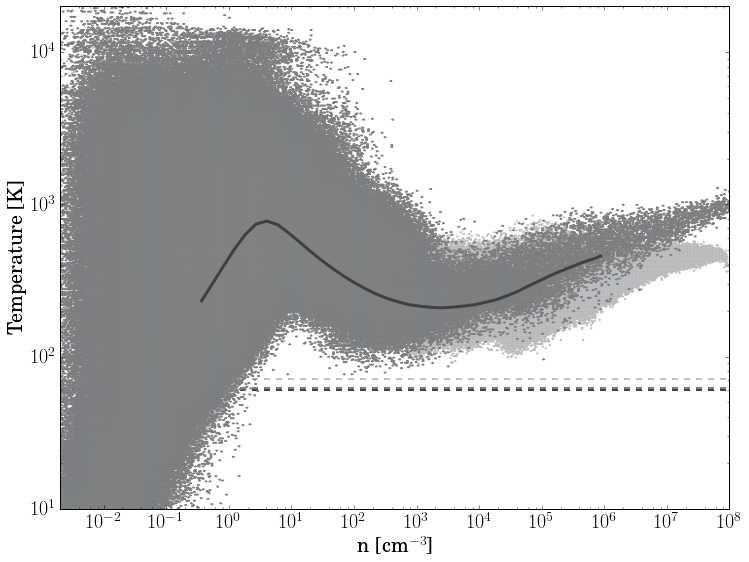

In [18]:
fig,ax = plt.subplots(figsize=(12,9))
ax.axhline(2.725 * (snapV0.header.Redshift + 1), lw=2, ls='--', color='.75', zorder=1)
ax.axhline(2.725 * (snapV.header.Redshift + 1), lw=2, ls='--', color='.5', zorder=1)
ax.axhline(2.725 * (21 + 1), lw=2, ls='--', color='.25', zorder=1)
ax = pyGadget.multiplot.Phase.temp(snapV0,ax, rasterized=True, color='.75', cmbline=False, zorder=2)
ax = pyGadget.multiplot.Phase.temp(snapV,ax, rasterized=True, color='.5', cmbline=False, zorder=2)
ax.plot(ars_temp.n, ars_temp.temp, color='.25', lw=3, ls='-', label="one-zone model")
ax.set_xlim(2e-3,1e8)
fig.savefig('figures/phase_diagrams/halo2_1zone_temp.png', bbox_inches='tight')